In [1]:
import pandas as pd

In [15]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
#check percentage of null values
isnull = df.isnull()
(isnull.sum()/isnull.count())*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [17]:
import seaborn as sns

<AxesSubplot:>

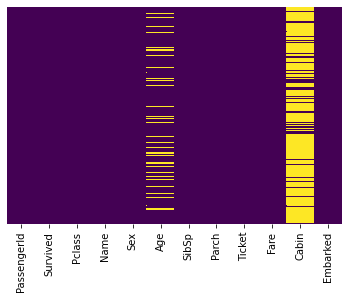

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

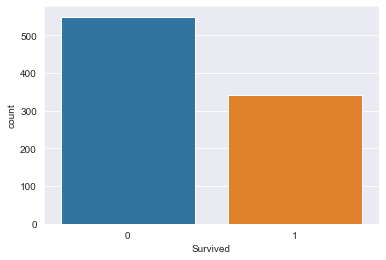

In [23]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

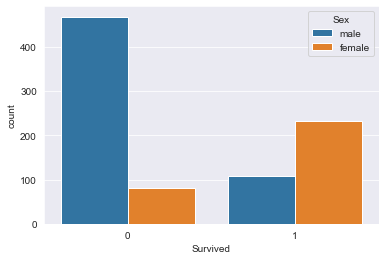

In [24]:
sns.countplot(x='Survived', hue='Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

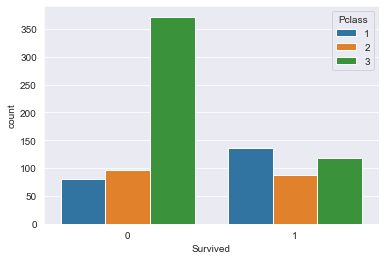

In [34]:
sns.countplot(x='Survived', hue='Pclass', data=df)

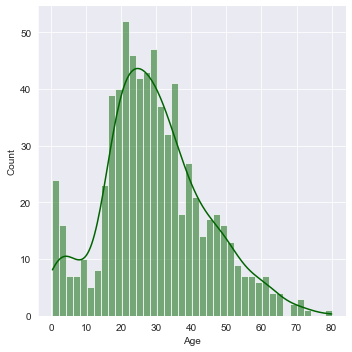

In [43]:
sns.displot(df['Age'].dropna(), kde=True, color='darkgreen', bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

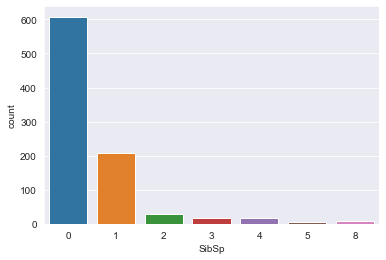

In [46]:
sns.countplot(x='SibSp', data=df)

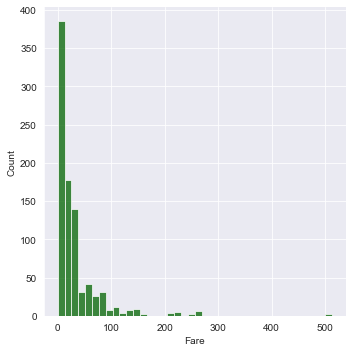

In [50]:
sns.displot(df['Fare'].dropna(), color='darkgreen', bins=40)

In [53]:
#drop Cabin column due to large number of null values
df.drop(['Cabin'], axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [54]:
#drop Name and Ticket columns since categorical and numerical variables are being considered for this analysis
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [55]:
df.count()

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

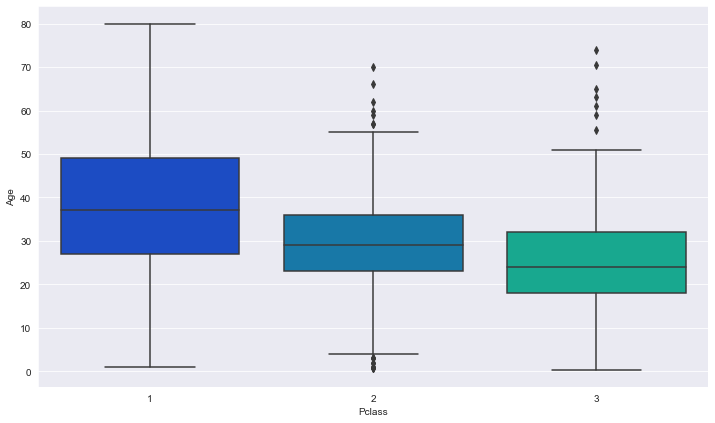

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

In [57]:
Pclass1_age = df.where(df['Pclass'] == 1, inplace = False)['Age'].quantile(0.5)
Pclass2_age = df.where(df['Pclass'] == 2, inplace = False)['Age'].quantile(0.5)
Pclass3_age = df.where(df['Pclass'] == 3, inplace = False)['Age'].quantile(0.5)
print('Pclass1_age = ' + str(Pclass1_age))
print('Pclass2_age = ' + str(Pclass2_age))
print('Pclass3_age = ' + str(Pclass3_age))

Pclass1_age = 37.0
Pclass2_age = 29.0
Pclass3_age = 24.0


In [58]:
def impute_age(Col):
    Age = Col[0]
    Pclass = Col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return Pclass1_age

        elif Pclass == 2:
            return Pclass2_age

        else:
            return Pclass3_age

    else:
        return Age

In [59]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)

In [60]:
df.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [61]:
df.dropna(inplace = True)
df.count()

Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

In [62]:
pd.get_dummies(df['Embarked'], drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [63]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
embarked = pd.get_dummies(df['Embarked'], drop_first = True)

In [64]:
df.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [65]:
df = pd.concat([df, sex, embarked], axis = 1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [150]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], 
                                                    test_size=0.30, 
                                                    random_state=1
                                                   )

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [175]:
logmodel = LogisticRegression(dual=False, max_iter=507)
logmodel.fit(X_train,y_train)
decisiontreemodel = RandomForestClassifier()
decisiontreemodel.fit(X_train,y_train)
decisiontreemodel

RandomForestClassifier()

In [176]:
predictions = logmodel.predict(X_test)
p2 = decisiontreemodel.predict(X_test)

In [177]:
from sklearn.metrics import confusion_matrix

In [183]:
accuracy=confusion_matrix(y_test, predictions)#predictions)
accuracy

array([[144,  22],
       [ 20,  81]], dtype=int64)

In [184]:
from sklearn.metrics import accuracy_score

In [185]:
accuracy=accuracy_score(y_test, predictions)
accuracy

0.8426966292134831

In [181]:
from sklearn.metrics import classification_report

In [182]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       166
           1       0.79      0.80      0.79       101

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [ ]:
#sns.pairplot(df, )
#sns.boxplot(df['Sex'], df['Age'], hue = 'Sex')
#df.head()